In [1]:
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import matplotlib.image as mpim
import xml2epub

In [2]:
# URL da página que você deseja extrair dados
url = 'https://www.royalroad.com/fiction/86184/rise-of-the-living-enchantment-litrpg-regression/chapter/1766104/thirty-nine-gangnar'

# Faz a requisição HTTP para a página
response = requests.get(url)

# Verifica se a requisição foi bem-sucedida (status code 200)
if response.status_code == 200:
    # Cria o objeto BeautifulSoup para fazer o parsing do HTML
    soup = BeautifulSoup(response.text, 'html.parser')
else:
    print("Falha ao acessar a página:", response.status_code)

In [ ]:
ficHeader = soup.find('div', class_='fic-header').a
url_base = "https://www.royalroad.com"
url_fic = url_base + ficHeader["href"]
ficTitle = ficHeader.h2.get_text()
print(ficHeader)
print(url_fic)
print(ficTitle)


<a href="/fiction/86184/rise-of-the-living-enchantment-litrpg-regression">
<h2 class="font-white inline-block" style="font-size: 24px">Rise of The Living Enchantment [LITRPG REGRESSION]</h2>
</a>
https://www.royalroad.com/fiction/86184/rise-of-the-living-enchantment-litrpg-regression
Rise of The Living Enchantment [LITRPG REGRESSION]


In [4]:
response = requests.get(url_fic)

if response.status_code == 200:
    # Cria o objeto BeautifulSoup para fazer o parsing do HTML
    fic_soup = BeautifulSoup(response.text, 'html.parser')
    # print(fic_soup)
else:
    print("Falha ao acessar a página:", response.status_code)

In [5]:
img_url = fic_soup.find('img', class_='thumbnail')['src']
img_url

'https://www.royalroadcdn.com/public/covers-large/living-enchantment-96662.jpg?time=1714966572'

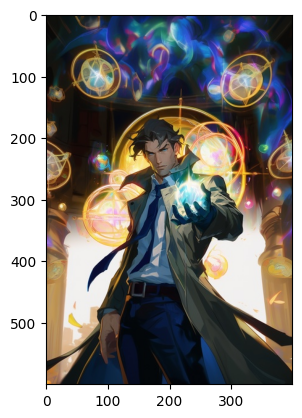

In [6]:
img_data = requests.get(img_url).content 
f = open('cover_img.jpg', 'wb')
f.write(img_data)
f.close()

img = plt.imread('cover_img.jpg')
plt.imshow(img)

In [17]:
book = xml2epub.Epub(ficTitle, language='en')
## create your own book cover
coverChapter = xml2epub.create_chapter_from_string('./cover_img.jpg', local=True, title='Cover', strict=False)
book.add_chapter(coverChapter)

In [18]:
chapterTitle = str(soup.h1)
chapterText = str(soup.find('div', class_='chapter-content'))
chapterText = chapterTitle + chapterText
chapterText

'<h1 class="font-white break-word" style="margin-top: 10px">THIRTY-NINE: Gangnar</h1><div class="chapter-inner chapter-content">\n<p class="cnNhZjE4Yzk2MmZhMDQwMDRiM2JiYzczMDk1NGQ0MmVj">Standing with such a great distance between them and Gangnar the starter was capable of lulling anyone who knew very little about gargoyles into a false sense of security. But Aiden wasn’t just anyone. There had been a time when he had been just anyone, but that time was long passed, gone like the first gargoyle he had killed after stepping beyond the natural array.</p>\n<p class="cnNkM2YzZjI5OWM2YTRhYzA5NzEwOWUxOGE4NThhZjAy">In the Order a lot of things had been taught and Aiden had learnt from them. Being weak, the most important thing he had learnt had been how to face a more powerful opponent or an uncertain opponent. And he had used those teachings very judiciously ever since coming back.</p>\n<p class="cnM3MWQwYjg5ZTZiZDRkZmZiMjc4MzkzOWFiNmM3YzZl">In his second life, he was stronger in most ways b

In [19]:
## create chapter
chapterTitle = soup.h1.text
ficChapter = xml2epub.create_chapter_from_string(chapterText, url=url, title=chapterTitle, strict=False)
book.add_chapter(ficChapter)



In [20]:
def getNextChapter(soup) :
    nextBtn = soup.find('div', class_='col-md-offset-4').a
    nextUrl = url_base + nextBtn["href"]

    # Faz a requisição HTTP para a página
    response = requests.get(nextUrl)

    # Verifica se a requisição foi bem-sucedida (status code 200)
    if response.status_code == 200:
        # Cria o objeto BeautifulSoup para fazer o parsing do HTML
        soup = BeautifulSoup(response.text, 'html.parser')
    else:
        print("Falha ao acessar a página:", response.status_code)
        
    return soup

In [21]:
for i in range(0, 40):
    try:
        soup = getNextChapter(soup)
    except:
        print("An exception occurred")
        break
    chapterTitle = str(soup.h1)
    chapterText = str(soup.find('div', class_='chapter-content'))
    chapterText = chapterTitle + chapterText

    print (f"{i} - Found: {soup.h1.text} ----- Adding Chapter...")
    ## create chapter
    chapterTitle = soup.h1.text
    ficChapter = xml2epub.create_chapter_from_string(chapterText, url=url, title=chapterTitle, strict=False)
    book.add_chapter(ficChapter)

0 - Found: FORTY: Friend Of Foe ----- Adding Chapter...
1 - Found: FORTY-ONE: New Plan ----- Adding Chapter...
2 - Found: FORTY-TWO: Social Life ----- Adding Chapter...
3 - Found: FORTY-THREE: A Dedicated Nanny ----- Adding Chapter...
4 - Found: FORTY-FOUR: By Force ----- Adding Chapter...
5 - Found: FORTY-FIVE: The Mysterious ----- Adding Chapter...
6 - Found: FORTY-SIX: Reward Status ----- Adding Chapter...
7 - Found: FORTY-SEVEN: A Sharp Sense And A Gentle Breeze ----- Adding Chapter...
8 - Found: FORTY-EIGHT: A Risk And A Waste ----- Adding Chapter...
9 - Found: FORTY-NINE: Lesser Than Less ----- Adding Chapter...
10 - Found: FIFTY: Not His Justification ----- Adding Chapter...
11 - Found: FIFTY-ONE: Locked ----- Adding Chapter...
12 - Found: FIFTY-TWO: Fate Walker ----- Adding Chapter...
13 - Found: FIFTY-THREE-Tarot ----- Adding Chapter...
14 - Found: FIFTY-FOUR: A Troublesome Younger Brother ----- Adding Chapter...
15 - Found: FIFTY-FIVE: Mage Radiant ----- Adding Chapter...
16 

In [22]:
## create ebook
book.create_epub('C:/Users/gabri/Codes/royalroadScrapperToKindle/')

'C:/Users/gabri/Codes/royalroadScrapperToKindle/Rise of The Living Enchantment [LITRPG REGRESSION].epub'